<a href="https://colab.research.google.com/github/Jiadia22/2025-AI_Application/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Datazip/week14/example_cluster.csv')

In [3]:
data #변수가 2개여서 2차원에 그림 그리기 가능

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


<Axes: xlabel='var_1', ylabel='var_2'>

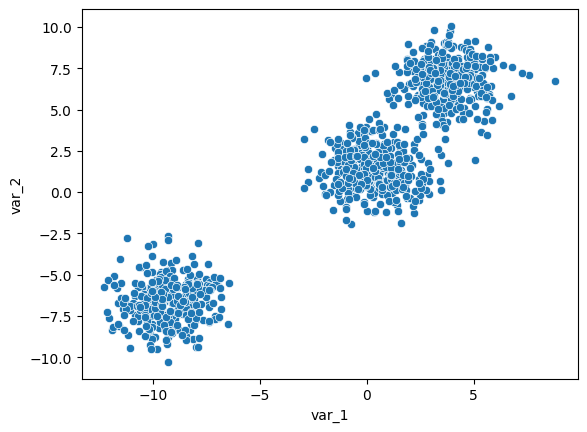

In [7]:
sns.scatterplot(x = 'var_1',y='var_2',data=data)

In [9]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=100)
kmeans_model.fit(data)

KMeans(n_clusters=3, random_state=100)

In [10]:
kmeans_model.predict(data)

array([2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0,
       0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1,
       0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2,
       0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1,

In [11]:
data['label'] = kmeans_model.predict(data)

<Axes: xlabel='var_1', ylabel='var_2'>

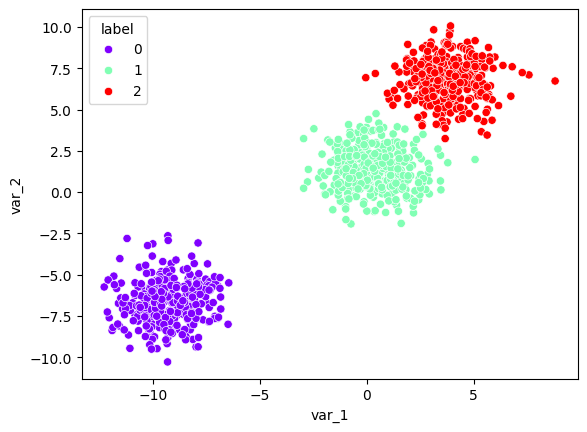

In [12]:
sns.scatterplot(x='var_1',y='var_2',data=data, hue='label',palette='rainbow')

In [13]:
kmeans_model_new = KMeans(n_clusters=4, random_state=100)
kmeans_model_new.fit(data)

KMeans(n_clusters=4, random_state=100)

In [15]:
data_new=data.copy()
data_new['new_label']=kmeans_model_new.predict(data)

In [16]:
data_new

,var_1,var_2,label,new_label
0,3.264413,6.929164,2,2
1,0.220814,2.251631,1,1
2,-8.786197,-8.333582,0,3
3,-0.008547,2.630791,1,1
4,4.912903,6.888520,2,2
...,...,...,...,...
995,4.678232,7.704404,2,2
996,5.250715,6.930948,2,2
997,-11.818752,-5.609853,0,0
998,0.613725,3.809334,1,1


<Axes: xlabel='var_1', ylabel='var_2'>

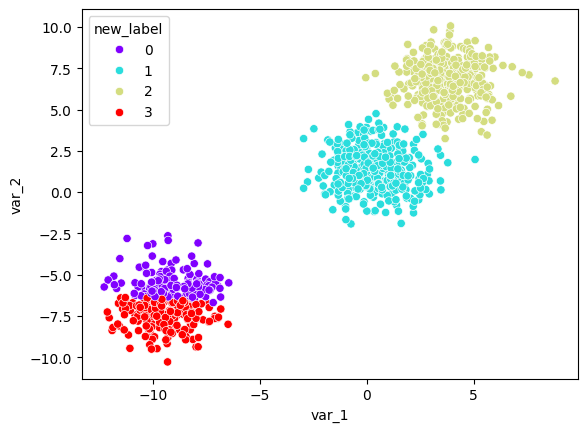

In [17]:
sns.scatterplot(x='var_1',y='var_2',data=data_new, hue='new_label',palette='rainbow')

객관적인 k 찾기 (이너셔)

In [18]:
kmeans_model.inertia_

3090.033237076663

In [20]:
temp_model = KMeans(n_clusters=500,random_state=100)
temp_model.fit(data)
temp_model.inertia_ # 두 점당 하나씩 군집 생기니까 이너셔 매우 작음

6.3412059092392274

In [23]:
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(data)
  distance.append(k_model.inertia_)
distance

[9908.551424778409,
 3090.033237076663,
 2761.755570553917,
 2436.819745971203,
 2197.2818514230803,
 1836.003868492886,
 1602.0829874129463,
 1508.5090594263029]

<Axes: >

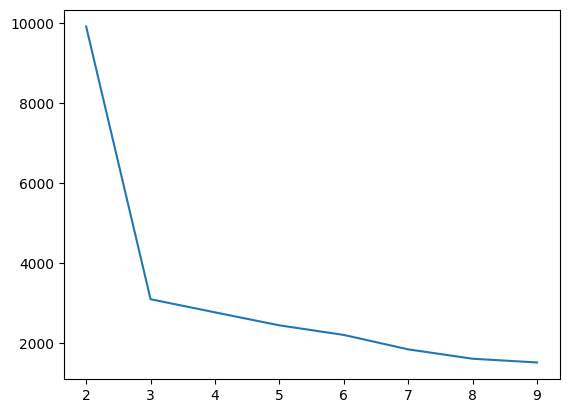

In [24]:
sns.lineplot(x=range(2,10),y=distance) #3개에서 변곡점이므로 제일 좋다

고객 클러스터링 시작

In [26]:
customer = pd.read_csv('/content/drive/MyDrive/Datazip/week14/customer.csv')

In [29]:
customer.head() #카드넘버, 범주, 거래금액

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [31]:
customer['cc_num'].nunique() #카드가 100개다

100

In [32]:
customer['category'].nunique()

11

더미 × 수치 → 정규화 (카테고리별 소비 특성을 수치화)

In [33]:
customer_dummy = pd.get_dummies(customer,columns=['category'])

In [34]:
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,False,False,False,False,False,False,False,True,False,False,False
1,630423337322,107.23,False,False,False,True,False,False,False,False,False,False,False
2,38859492057661,220.11,True,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,False,False,True,False,False,False,False,False,False,False,False
4,375534208663984,41.96,False,False,False,False,False,False,False,True,False,False,False


In [35]:
cat_list = customer_dummy.columns[2:]

In [36]:
for i in cat_list:
  customer_dummy[i] = customer_dummy[i]*customer_dummy['amt']

In [37]:
customer_dummy #자신이 들어간 것에는 값이 곱해져 있

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [38]:
customer_agg = customer_dummy.groupby('cc_num').sum()

In [39]:
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_df = pd.DataFrame(scale.fit_transform(customer_agg),columns=customer_agg.columns, index=customer_agg.index)

In [42]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


<Axes: >

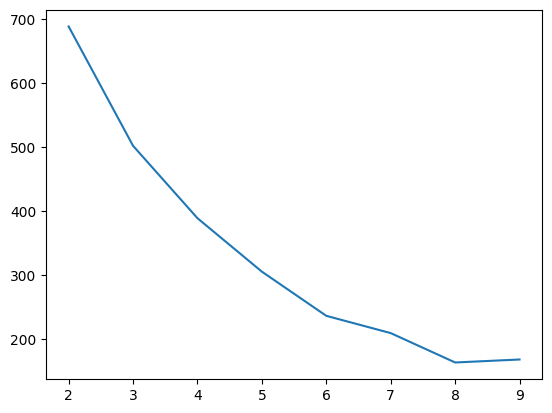

In [43]:
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  distance.append(k_model.inertia_)
distance

sns.lineplot(x=range(2,10),y=distance) # 급격히 줄어드는 지점이 없음 -> 실루엣계수 적용

In [46]:
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  sil.append(silhouette_score(scaled_df,labels))

<Axes: >

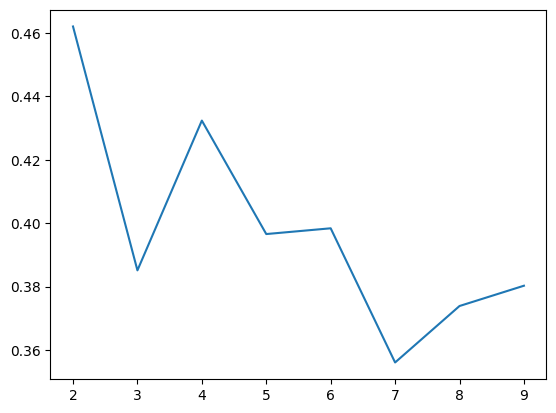

In [47]:
sns.lineplot(x=range(2,10),y=sil) #실루엣이 높을수록 좋은 군집 분류, 4개로 판

In [48]:
k_model = KMeans(n_clusters=4)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [49]:
scaled_df['label']=labels

In [50]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,1
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,0
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,3
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,1
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,0


잘 되었나 해석


In [52]:
scaled_df_mean = scaled_df.groupby('label').mean()
scaled_df_count = scaled_df.groupby('label').count()['category_travel']

In [53]:
scaled_df_count = scaled_df_count.rename('count')

In [55]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [56]:
scaled_df_all
#평균정도의 지출, 평균보다 적은 지출, 평균보다 많은 지출.

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,0.372023,0.215463,0.277615,0.885459,0.226599,0.440311,0.381802,0.709355,0.429554,0.516388,0.125844,-0.263144,40
1,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
2,2.246930,2.636017,2.102489,-0.339554,2.553883,1.526188,1.118452,1.527483,2.410239,2.042583,2.581577,-0.269260,7
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
